In [1]:
from utils import Scalar, draw_graph
from linear_model import Linear, mse

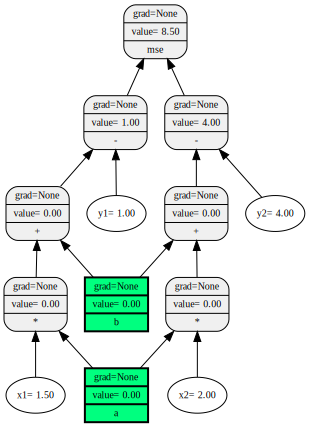

In [2]:
# 计算图膨胀
model = Linear()
x1 = Scalar(1.5, label='x1', requires_grad=False)
y1 = Scalar(1.0, label='y1', requires_grad=False)
x2 = Scalar(2.0, label='x2', requires_grad=False)
y2 = Scalar(4.0, label='y2', requires_grad=False)

loss = mse([model.error(x1, y1), model.error(x2, y2)])
draw_graph(loss)

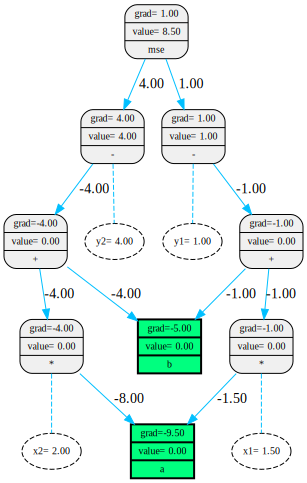

In [3]:
# 第一次触发方向传播
loss.backward()
draw_graph(loss, 'backward')

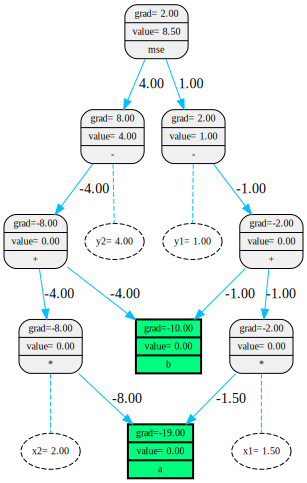

In [4]:
# 第二次触发方向传播
loss.backward()
draw_graph(loss, 'backward')

In [5]:
import torch

# 固定随机种子，使得运行结果可以稳定复现
torch.manual_seed(1024)
# 产生训练用的数据
x_origin = torch.linspace(100, 300, 200)
# 将变量X归一化，否则梯度下降法很容易不稳定
x = (x_origin - torch.mean(x_origin)) / torch.std(x_origin)
epsilon = torch.randn(x.shape)
y = 10 * x + 5 + epsilon

In [6]:
# 生成模型
model = Linear()
# 定义每批次用到的数据量
batch_size = 20
learning_rate = 0.1

for t in range(20):
    # 选取当前批次的数据，用于训练模型
    ix = (t * batch_size) % len(x)
    xx = x[ix: ix + batch_size]
    yy = y[ix: ix + batch_size]
    # 计算当前批次数据的损失
    loss = mse([model.error(_x, _y) for _x, _y in zip(xx, yy)])
    # 计算损失函数的梯度
    loss.backward()
    # 迭代更新模型参数的估计值
    model.a -= learning_rate * model.a.grad
    model.b -= learning_rate * model.b.grad
    # 将使用完的梯度清零
    model.a.grad = 0.0
    model.b.grad = 0.0
    print(f'Step {t + 1}, Result: {model.string()}')

Step 1, Result: y = 3.12 * x + -1.99
Step 2, Result: y = 3.48 * x + -2.28
Step 3, Result: y = 3.22 * x + -1.97
Step 4, Result: y = 2.85 * x + -1.22
Step 5, Result: y = 2.68 * x + -0.23
Step 6, Result: y = 2.92 * x + 1.08
Step 7, Result: y = 3.74 * x + 2.61
Step 8, Result: y = 5.07 * x + 4.15
Step 9, Result: y = 6.73 * x + 5.52
Step 10, Result: y = 8.22 * x + 6.48
Step 11, Result: y = 9.36 * x + 5.75
Step 12, Result: y = 9.75 * x + 5.42
Step 13, Result: y = 9.88 * x + 5.28
Step 14, Result: y = 9.89 * x + 5.26
Step 15, Result: y = 9.89 * x + 5.20
Step 16, Result: y = 9.88 * x + 5.18
Step 17, Result: y = 9.88 * x + 5.17
Step 18, Result: y = 9.84 * x + 5.14
Step 19, Result: y = 9.86 * x + 5.15
Step 20, Result: y = 9.94 * x + 5.21
